In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [14]:
pd.set_option('display.max_colwidth', None)

In [15]:
df = pd.read_csv("tataSteel.csv")

In [16]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/10/2024,162.40,162.60,164.30,161.95,31.45M,0.31%
1,05/09/2024,161.90,165.95,166.70,161.50,30.22M,-2.50%
2,05/08/2024,166.05,164.20,167.10,163.50,30.13M,1.10%
3,05/07/2024,164.25,167.95,167.95,162.30,43.61M,-1.91%
4,05/06/2024,167.45,167.80,168.65,164.80,37.59M,0.57%


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2561 non-null   object 
 1   Price     2561 non-null   float64
 2   Open      2561 non-null   float64
 3   High      2561 non-null   float64
 4   Low       2561 non-null   float64
 5   Vol.      2561 non-null   object 
 6   Change %  2561 non-null   object 
dtypes: float64(4), object(3)
memory usage: 140.2+ KB


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df = df.set_index('Date')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2561 entries, 2024-05-10 to 2014-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2561 non-null   float64
 1   Open      2561 non-null   float64
 2   High      2561 non-null   float64
 3   Low       2561 non-null   float64
 4   Vol.      2561 non-null   object 
 5   Change %  2561 non-null   object 
dtypes: float64(4), object(2)
memory usage: 140.1+ KB


In [50]:
df.columns

Index(['Price'], dtype='object')

In [22]:
df.index

DatetimeIndex(['2024-05-10', '2024-05-09', '2024-05-08', '2024-05-07',
               '2024-05-06', '2024-05-03', '2024-05-02', '2024-04-30',
               '2024-04-29', '2024-04-26',
               ...
               '2014-01-14', '2014-01-13', '2014-01-10', '2014-01-09',
               '2014-01-08', '2014-01-07', '2014-01-06', '2014-01-03',
               '2014-01-02', '2014-01-01'],
              dtype='datetime64[ns]', name='Date', length=2561, freq=None)

In [49]:
df.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)

In [51]:
df = df.sort_values('Date')

In [52]:
df.to_csv('model_modified.csv',index=True)

In [23]:
steel_prices = df.loc[:,'Price']
steel_prices.head()

Date
2024-05-10    162.40
2024-05-09    161.90
2024-05-08    166.05
2024-05-07    164.25
2024-05-06    167.45
Name: Price, dtype: float64

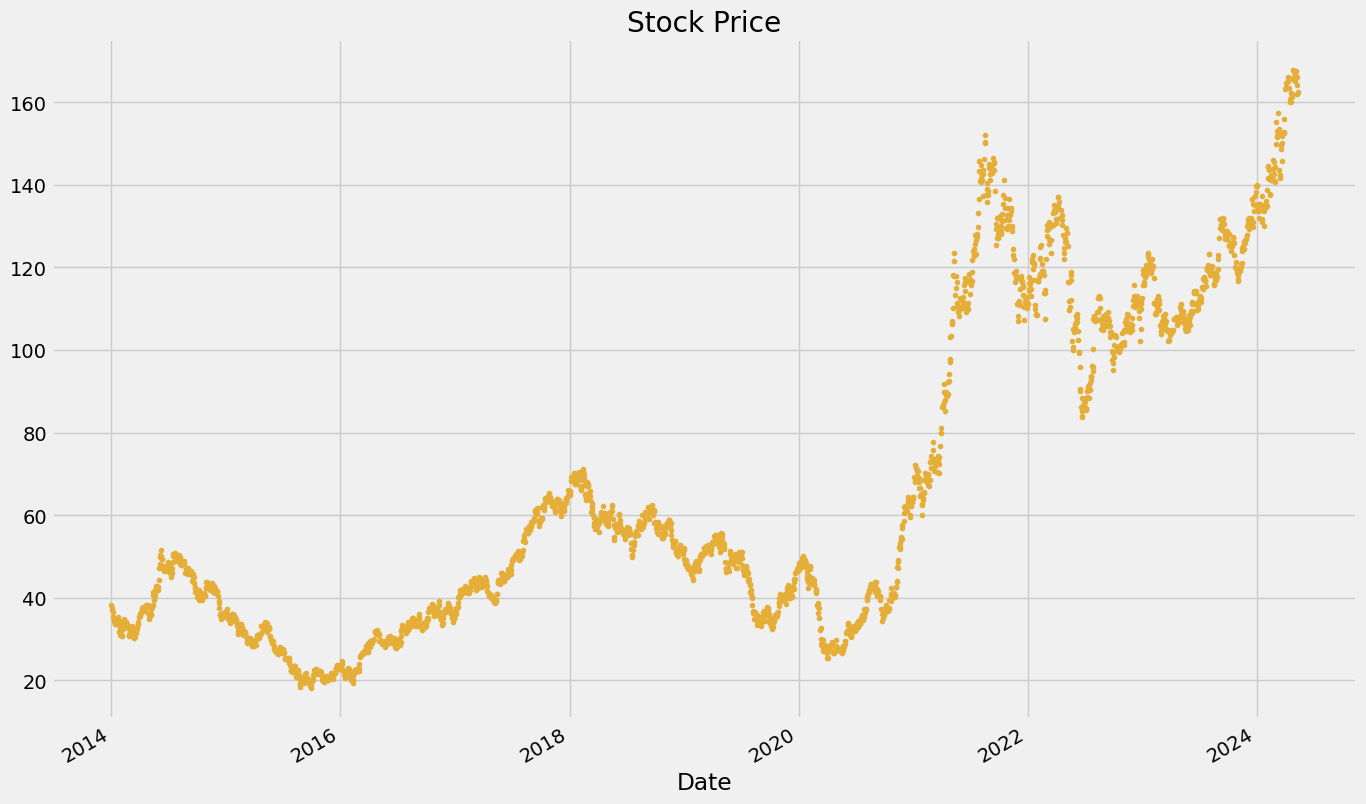

In [24]:
steel_prices.plot(
    style='.',
    figsize=(15,10),
    color= col_pal[2],
    title='Stock Price'
)
plt.show()

In [25]:
allTimeHigh = pd.Series(steel_prices)
maxPrice = allTimeHigh.max()

dateOfallTimeHigh = allTimeHigh.loc[allTimeHigh == maxPrice]
dateOfallTimeHigh

Date
2024-04-25    167.7
Name: Price, dtype: float64

In [26]:
allTimeLow = pd.Series(steel_prices)
minPrice = allTimeLow.min()

dateOfallTimeLow = allTimeLow.loc[allTimeLow == minPrice]
dateOfallTimeLow

Date
2015-09-29    18.07
Name: Price, dtype: float64

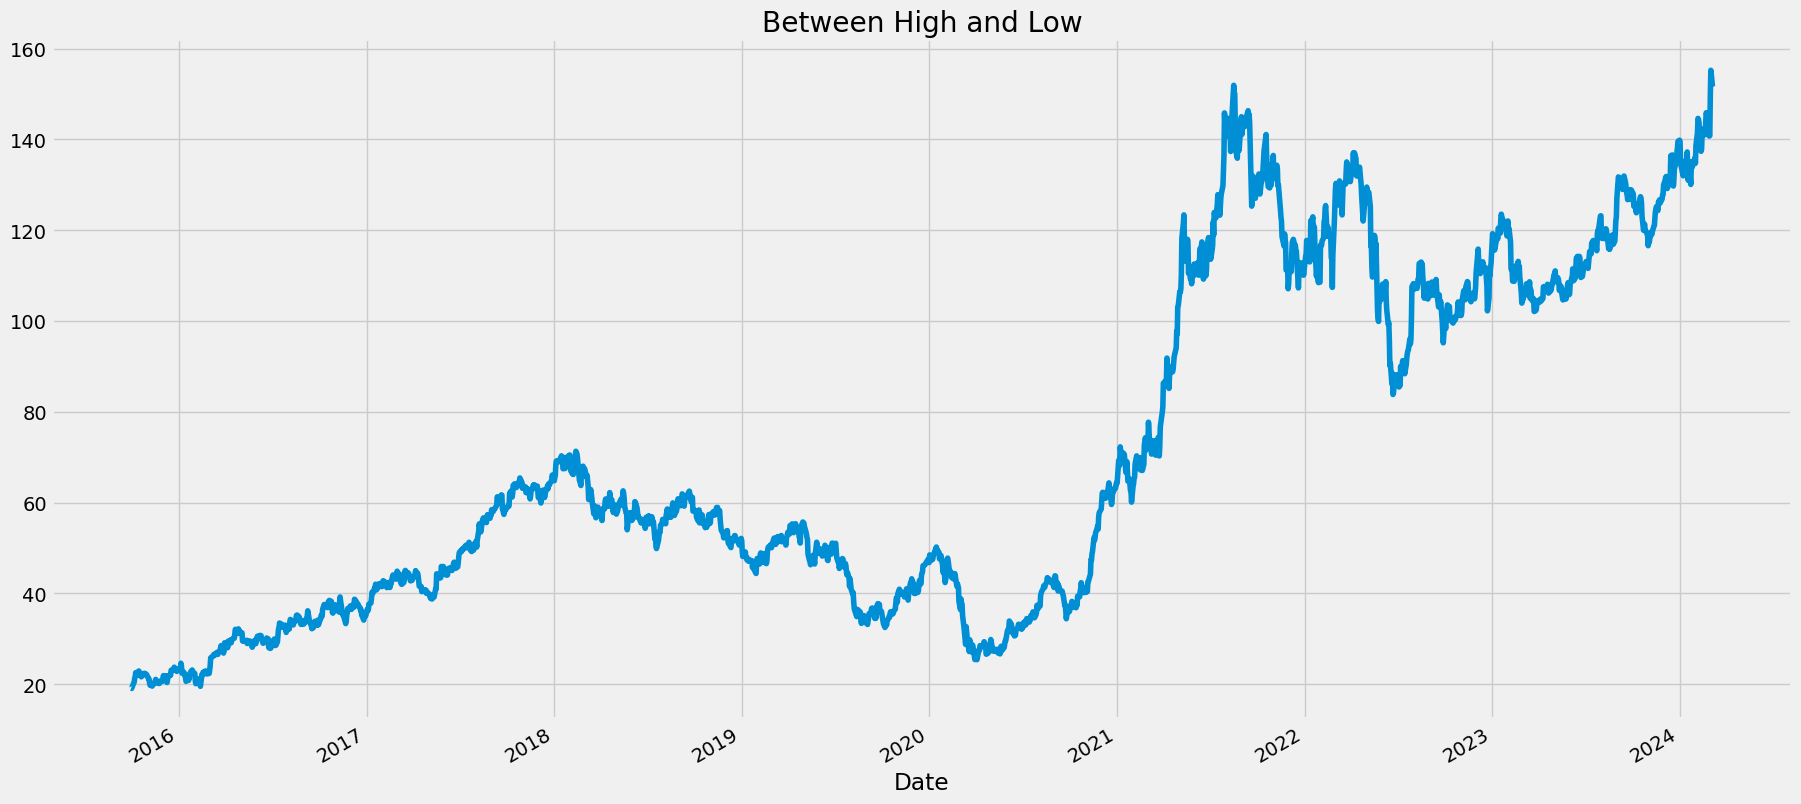

In [27]:
start_date = pd.to_datetime('2015-09-29')
end_date = pd.to_datetime('2024-03-07')

steel_prices.loc[(steel_prices.index > start_date) & (steel_prices.index < end_date)].plot(figsize=(20,10), title='Between High and Low')
plt.show()

In [28]:
stll = steel_prices.reset_index()

In [29]:
stll.head()

,Date,Price
0,2024-05-10,162.40
1,2024-05-09,161.90
2,2024-05-08,166.05
3,2024-05-07,164.25
4,2024-05-06,167.45


<Axes: ylabel='Frequency'>

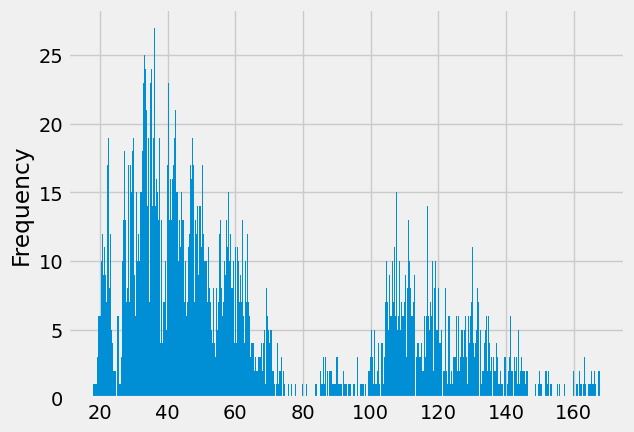

In [30]:
stll['Price'].plot(kind='hist',bins=500)

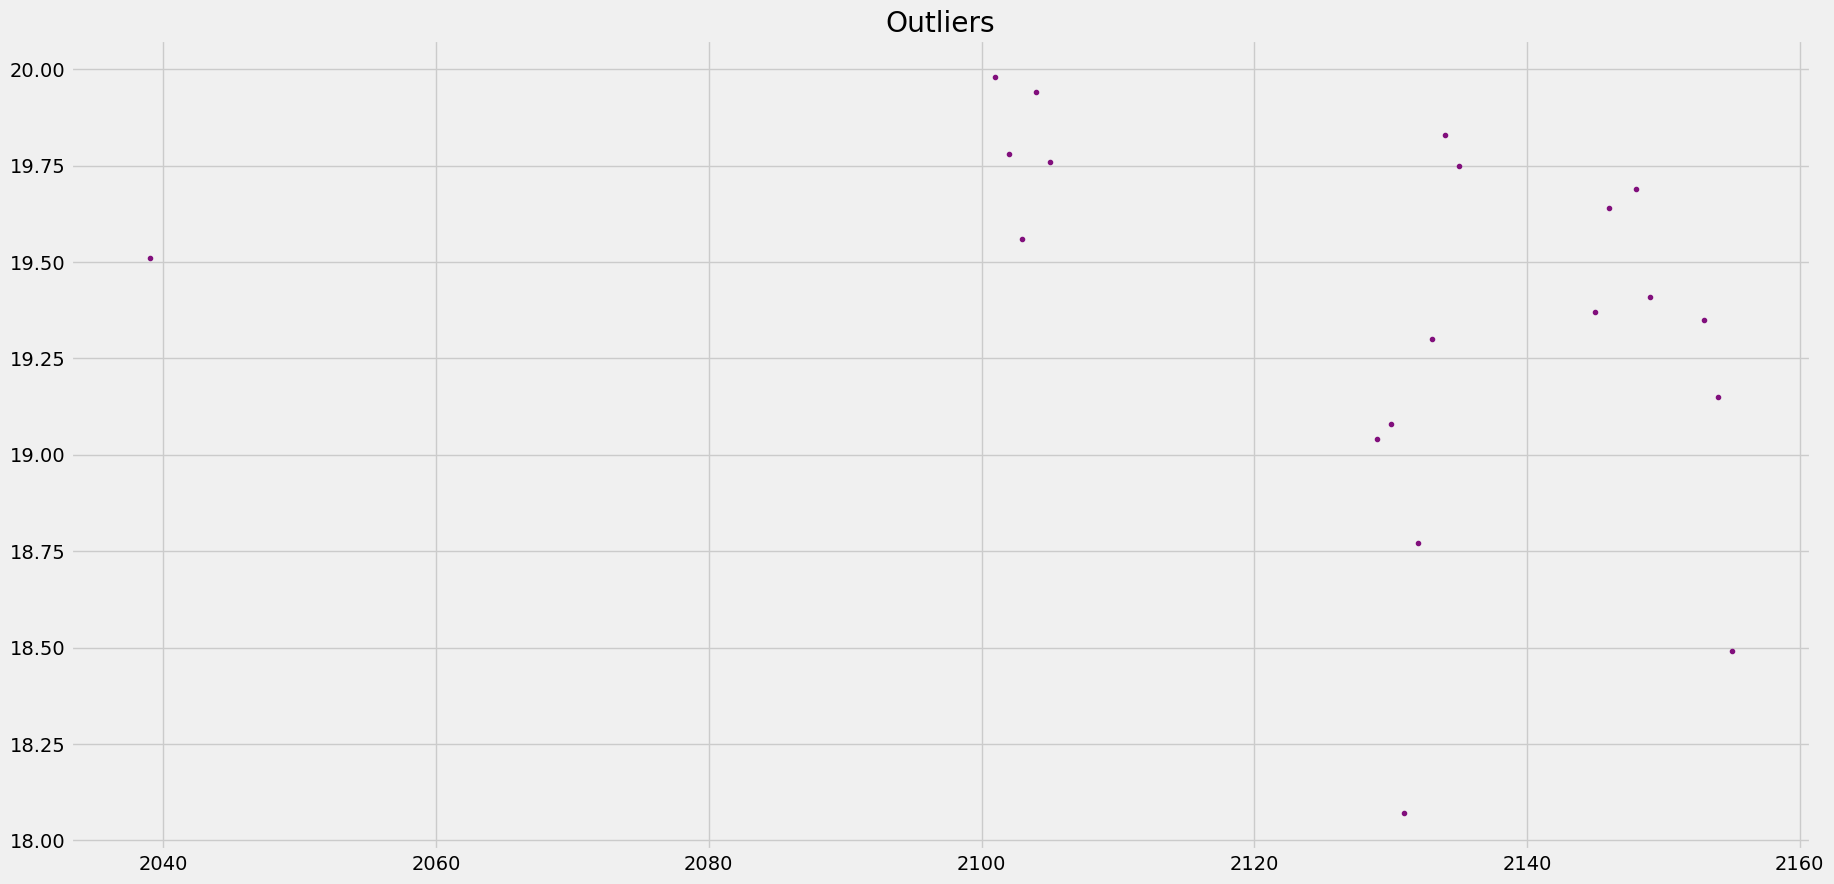

In [31]:
stll.query('Price < 20')['Price'].plot(style ='.',figsize=(20,10),color= col_pal[5],title='Outliers')
plt.show()

In [32]:
lessthan20 = stll.loc[:,'Price'] < 20
lessthan20.value_counts()

Price
False    2541
True       20
Name: count, dtype: int64

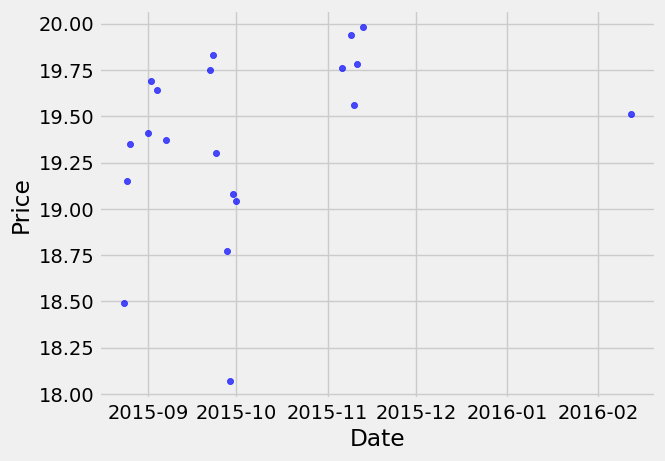

In [33]:
lessthanTwenty = stll.loc[stll['Price']< 20]
lessthanTwenty.plot.scatter(x='Date',y='Price', c='blue', alpha=0.7)
plt.grid(True)
plt.show()

In [34]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-10,162.40,162.60,164.30,161.95,31.45M,0.31%
2024-05-09,161.90,165.95,166.70,161.50,30.22M,-2.50%
2024-05-08,166.05,164.20,167.10,163.50,30.13M,1.10%
2024-05-07,164.25,167.95,167.95,162.30,43.61M,-1.91%
2024-05-06,167.45,167.80,168.65,164.80,37.59M,0.57%


In [35]:
steel = df.copy()

In [36]:
steel.drop(['Vol.','Change %'],axis=1,inplace=True)

In [37]:
steel.head()

,Price,Open,High,Low
Date,,,,
2024-05-10,162.40,162.60,164.30,161.95
2024-05-09,161.90,165.95,166.70,161.50
2024-05-08,166.05,164.20,167.10,163.50
2024-05-07,164.25,167.95,167.95,162.30
2024-05-06,167.45,167.80,168.65,164.80


In [38]:
steel = steel.sort_values('Date')

In [39]:
steel.to_csv('model.csv',index=True)

In [40]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2561 entries, 2014-01-01 to 2024-05-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2561 non-null   float64
 1   Open    2561 non-null   float64
 2   High    2561 non-null   float64
 3   Low     2561 non-null   float64
dtypes: float64(4)
memory usage: 100.0 KB


In [41]:
X = steel[['Open','High','Low']]
y = steel['Price']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# # X_test = X_test.to_numpy()
# X_test = X_test.reshape(-1,1)
# X_test.shape

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([104.30915461,  70.53248539,  58.61153762,  21.73191896,
        50.48784   ,  34.57999293,  40.53958977,  45.61953944,
        52.596372  ,  44.477702  ,  58.01880701,  39.75585951,
        61.10415234, 149.3324297 , 111.1047056 ,  44.45417339,
        42.08889765,  56.69072779,  46.52175409,  33.63231389,
        85.73398208,  19.01787299, 130.82378758,  48.87228519,
        41.7377286 ,  40.85272519, 126.22360436,  46.67543672,
       129.31440684,  61.95641118, 107.10443246,  32.81642921,
        31.9573704 , 104.88468387,  50.80523872,  37.46052074,
        40.05514186,  63.55547516,  40.16000366,  22.25498044,
        36.51350099,  65.02436474,  27.47905623, 119.15821974,
        32.40270561,  37.29857735,  85.53728031, 110.78283876,
       133.67289985,  20.04212321,  27.50884488,  62.67938662,
       116.16273469,  45.11982647,  19.67805802,  50.03592211,
       107.76840446,  42.53208202,  39.76556207,  64.00714663,
        46.11983085,  31.20180737,  41.76409458,  19.31

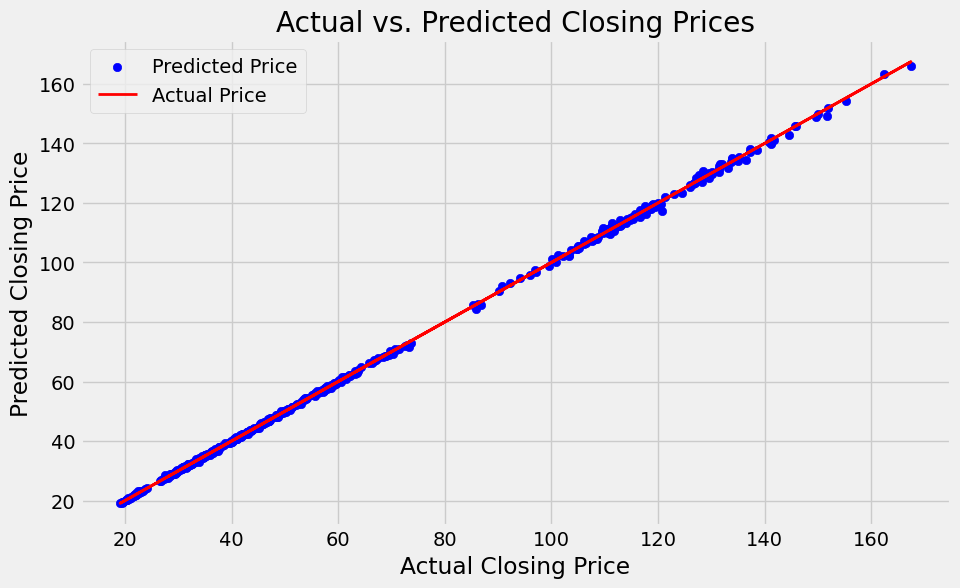

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted Price")
plt.plot(y_test, y_test, color="red", linewidth=2, label="Actual Price")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.legend()
plt.grid(True)
plt.show()